평균 절대 오차(MAE): 15.1


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

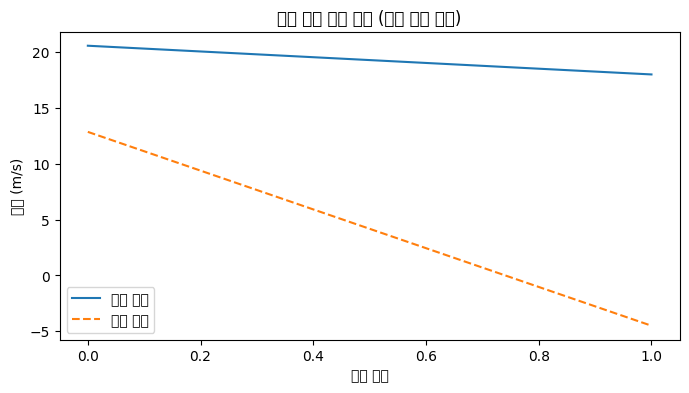

In [1]:
# 기상청 태풍 데이터를 이용한 간단한 6시간 뒤 풍속 예측 모델

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# (1) 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/swimiqus2/typhoon-ai-model/main/data/typhoon_kma_sample.csv')

# (2) 결측치 제거
df = df.dropna(subset=['wind', 'pressure', 'lat', 'lon'])

# (3) 단위 통일 (kt → m/s 변환)
df['wind'] = df['wind'] * 0.514

# (4) 파생변수 생성
df['wind_change'] = df['wind'].diff()
df['move_lat'] = df['lat'].diff()
df['move_lon'] = df['lon'].diff()

# (5) 6시간 뒤 풍속(target)
df['target'] = df['wind'].shift(-1)
df = df.dropna()

# (6) 학습/테스트 데이터 분리
X = df[['wind', 'pressure', 'lat', 'lon']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# (7) 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# (8) 평가
mae = mean_absolute_error(y_test, pred)
print("평균 절대 오차(MAE):", round(mae, 2))

# (9) 시각화
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label='실제 풍속')
plt.plot(pred, label='예측 풍속', linestyle='--')
plt.legend()
plt.title('태풍 풍속 예측 비교 (단순 회귀 모델)')
plt.xlabel('시간 순서')
plt.ylabel('풍속 (m/s)')
plt.show()